In [1]:
# Upload the Dataset

from google.colab import files
files.upload()


{}

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Define the Dataset

df = pd.read_csv("train.csv")
print(df.head())
print("\nShape :", df.shape)
print("\n",df.info())
print("\n",df.describe())



   ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                      0.0                      0.0  ...

In [3]:
# Initialize the Variables

X = df.drop(["TARGET"], axis = 1)
y = df.TARGET


In [4]:
# Split the Data into Train & Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (53214, 370)
X_test shape: (22806, 370)
y_train shape: (53214,)
y_test shape: (22806,)


## Apply Variance Threshold

In [5]:
from sklearn.feature_selection import VarianceThreshold

VT = VarianceThreshold(threshold=0)
VT.fit(X_train)


VarianceThreshold(threshold=0)

In [6]:
# See the Threshold for the Data

VT.get_support()

# True ----> Non Zero Variance
# False ---> Zero Variance


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [7]:
# Find out the columns having Non Zero variance

Affected = sum(VT.get_support())
print("Number of Non Zero Variance Columns :", Affected)


# Find out the columns having Zero variance

Non_Affected = sum(~VT.get_support())
print("Number of Zero Variance Columns :", Non_Affected)


Number of Non Zero Variance Columns : 324
Number of Zero Variance Columns : 46


In [8]:
# Get the Zero Variance Column

Zero = [column for column in X_train if column not in X_train.columns[VT.get_support()]]

print("Zero Variance Columns :", len(Zero))


Zero Variance Columns : 46


To avoid overfitting we only perform in X_train to out the Zero variance column after we will remove thosein both X_train & X_test.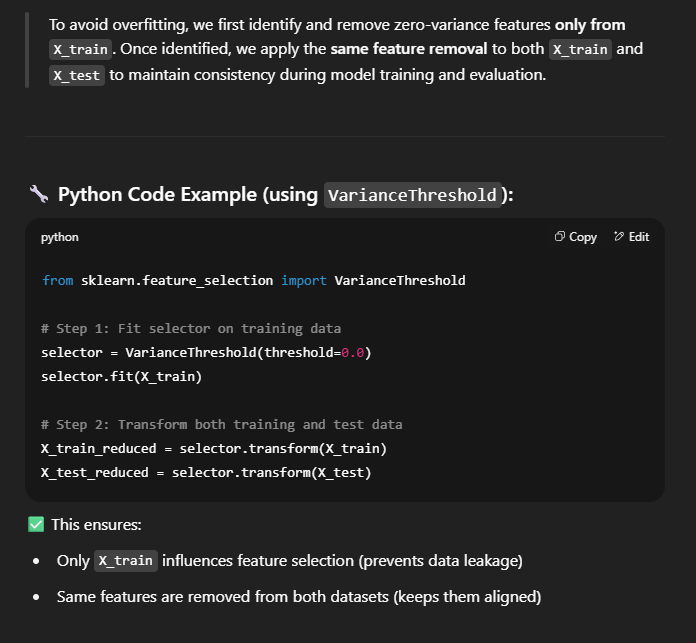

In [9]:
# Drop the columns

X_train.drop(Zero, axis=1, inplace=True)
X_test.drop(Zero, axis=1, inplace=True)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (53214, 324)
X_test shape: (22806, 324)
